# **TP 3**: Representación de conocimiento

## **Fecha de entrega**: 26/05/2025 a las 23:59hs.

**Condiciones de entrega:** el trabajo práctico deberá ser realizado en forma individual. Se deberá subir en la sección del Campus Virtual correspondiente el enlace a Colab. No olvidar configurar el documento para que sea accesible a cualquier persona con el enlace o en su defecto compartirlo con cristian.pacifico@uner.edu.ar y antonella.garcia@uner.edu.ar

## **Simpsons**

**Resolver en Python utilizando la librería pySwip**. Teniendo en cuenta el árbol genealógico de la familia Simpsons:

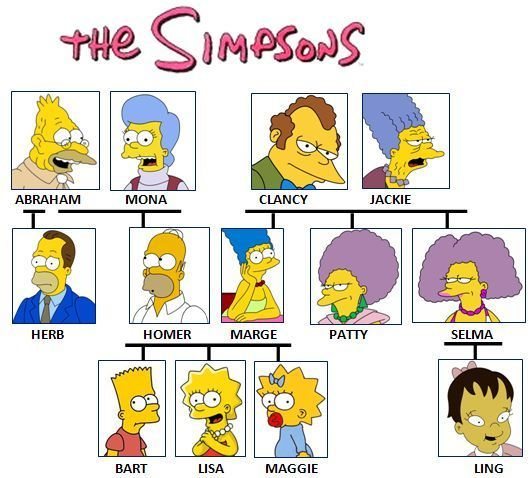

####1- Definir los hechos padre y madre.

In [2]:
from pyswip import Prolog

prolog = Prolog()

In [3]:
#arbol genealogico de los simpsons

#padres
prolog.assertz("padre(abraham, homer)")
prolog.assertz("padre(abraham, herb)")
prolog.assertz("padre(homer, bart)")
prolog.assertz("padre(homer, lisa)")
prolog.assertz("padre(homer, maggie)")
prolog.assertz("padre(clancy, marge)")
prolog.assertz("padre(clancy, patty)")
prolog.assertz("padre(clancy, selma)")

#madres
prolog.assertz("madre(mona, homer)")
prolog.assertz("madre(jackie, patty)")
prolog.assertz("madre(jackie, selma)")
prolog.assertz("madre(jackie,marge)")
prolog.assertz("madre(marge, bart)")
prolog.assertz("madre(marge, lisa)")
prolog.assertz("madre(marge, maggie)")


#### 2- Definir *progenitores(x,y)* que comprueba si x es **madre** o **padre** de y.

In [4]:
prolog.assertz("progenitor(X, Y) :- padre(X, Y); madre(X, Y)")

#### 3- Definir *abuelos(x,y)* que nos permite saber si x es abuelo de y.

In [5]:
prolog.assertz("abuelos(X, Y) :- progenitor(X, Z), progenitor(Z, Y)")

#### 4- Definir *hermano(x,y)*.

In [6]:
prolog.assertz("hermano(X, Y) :- progenitor(Z, X), progenitor(Z, Y), X \= Y")

#### 5- Definir *tio(x,y)*.

In [7]:
prolog.assertz("tio(X, Y) :- progenitor(Z, Y), hermano(X, Z)")

#### 6- Encontrar los hijos de Homero.

In [12]:
for solution in prolog.query("padre(homer,X)"):
    print(f"Hijo/a de Homer: {solution['X']}")

Hijo/a de Homer: bart
Hijo/a de Homer: lisa
Hijo/a de Homer: maggie


#### 7- Encontrar la madre de Marge.

In [ ]:
for solution in prolog.query("madre(X, marge)"):
    print(f"La madre de Marge es: {solution['X']}")

La madre de Marge es: jackie


#### 8- Encontrar los padres de Lisa.

In [18]:
for solution in prolog.query("progenitor(X, lisa)"):
    print(f"Los padres de lisa son: {solution['X']}")

Los padres de lisa son: homer
Los padres de lisa son: marge


#### 9- Encontrar los sobrinos de Selma.

In [23]:
sobrinos = set()
for solution in prolog.query("tio(selma, Y)"):
    sobrinos.add(solution['Y'])

for sobrino in sobrinos:
    print(f"Sobrino/a de Selma: {sobrino}")

Sobrino/a de Selma: bart
Sobrino/a de Selma: maggie
Sobrino/a de Selma: lisa


## **Subte**

A partir de la información proporcionada por la imagen que se presenta a continuación realizar las actividades propuestas, teniendo en cuenta que:

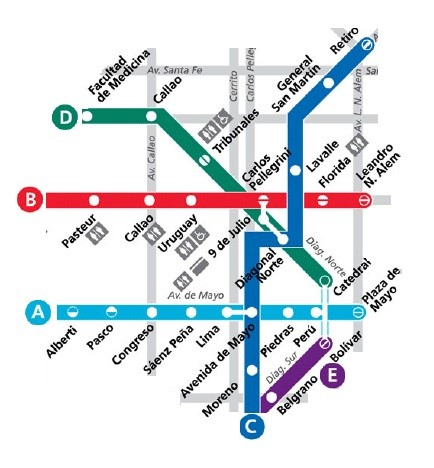

* Las líneas conectan por medio de vías a distintas estaciones. Puede suponer que las líneas sólo funcionan en una dirección, de izquierda a derecha y de abajo hacia arriba.
* Las conexiones blancas entre estaciones de distintas lineas representan puntos de combinación entre líneas. Por ejemplo, es posible realizar una combinación entre las líneas D y C en las estaciones 9 de Julio (línea D) y Diagonal Norte (línea C). Estas conexiones no representan vías, son accesos peatonales, escaleras u otros medios.

#### 1- Definir las estaciones adyacentes (directamente conectadas) para cada línea de subte, y los puntos de combinación entre estaciones de diferentes líneas.  

In [ ]:
#Linea A
prolog.assertz("adyacente(a, alberti, pasco)")
prolog.assertz("adyacente(a, pasco, congreso)")
prolog.assertz("adyacente(a, congreso, saenz peña)")
prolog.assertz("adyacente(a, saenz peña, lima)")
prolog.assertz("adyacente(a, lima, avenida de mayo)")
prolog.assertz("adyacente(a, avenida de mayo, piedras)")
prolog.assertz("adyacente(a, piedras, peru)")
prolog.assertz("adyacente(a, peru, plaza de mayo)")

#Linea B
prolog.assertz("adyacente(b, pasteur, callao)")
prolog.assertz("adyacente(b, callao, uruguay)")
prolog.assertz("adyacente(b, uruguay, carlos pellegrini)")
prolog.assertz("adyacente(b, carlos pellegrini, florida)")
prolog.assertz("adyacente(b, florida, leandro n. alem)")

#Linea C
prolog.assertz("adyacente(c, moreno, avenida de mayo)")
prolog.assertz("adyacente(c, avenida de mayo, diagonal norte)")
prolog.assertz("adyacente(c, diagonal norte, lavalle)")
prolog.assertz("adyacente(c, lavalle, general san martín)")
prolog.assertz("adyacente(c, general san martín, retiro)")

#Linea D


#### 2- Definir la relación *cerca(X,Y)*, que establece que dos estaciones están cerca si están en la misma línea y no hay más de una estación entre ellas.

#### 3- Definir la relación *conectada(X,Y)*, que establece que dos estaciones están en la misma línea.

#### 4- Definir la relación *accesible(X,Y)*, que establece que dos estaciones son accesibles si están conectadas en la misma línea; o bién, estañn conectadas a dos o más estaciones asociadas en un punto de combinación.